# Cassification using Logistic Regression

Logistic regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary).  Like all regression analyses, the logistic regression is a predictive analysis.  Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

Importing dependencies

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

Loading the Heart Failure Dataset

In [ ]:
heart = pd.read_csv("/content/heart_failure_clinical_records_dataset.csv")
heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Data Summary

In [ ]:
heart["DEATH_EVENT"].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [ ]:
heart["anaemia"].value_counts()

0    170
1    129
Name: anaemia, dtype: int64

In [ ]:
heart["sex"].value_counts()

1    194
0    105
Name: sex, dtype: int64

In [ ]:
heart["diabetes"].value_counts()

0    174
1    125
Name: diabetes, dtype: int64

In [ ]:
heart["high_blood_pressure"].value_counts()

0    194
1    105
Name: high_blood_pressure, dtype: int64

In [ ]:
heart["smoking"].value_counts()

0    203
1     96
Name: smoking, dtype: int64

Scatter Plot of the Heart Failure Dataset (platelets VS ejection_fraction)

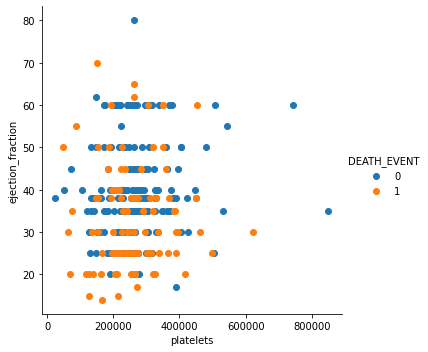

In [ ]:
sns.FacetGrid(heart, hue="DEATH_EVENT",height=5).map(plt.scatter, "platelets", "ejection_fraction").add_legend()

# Logistic Regression

Preparing traning set

In [ ]:
X = heart.iloc[:, :-1]
y = heart.iloc[:, -1] 

Ploting relation

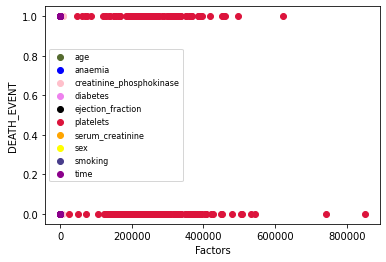

In [ ]:
plt.xlabel('Factors')
plt.ylabel('DEATH_EVENT')

pltX = heart.loc[:, 'age']
pltY = heart.loc[:, 'DEATH_EVENT']
plt.scatter(pltX, pltY, color='darkolivegreen', Label='age')

pltX = heart.loc[:, 'anaemia']
pltY = heart.loc[:, 'DEATH_EVENT']
plt.scatter(pltX, pltY, color='blue', Label='anaemia')

pltX = heart.loc[:, 'creatinine_phosphokinase']
pltY = heart.loc[:, 'DEATH_EVENT']
plt.scatter(pltX, pltY, color='pink', Label='creatinine_phosphokinase')

pltX = heart.loc[:, 'diabetes']
pltY = heart.loc[:, 'DEATH_EVENT']
plt.scatter(pltX, pltY, color='violet', Label='diabetes')

pltX = heart.loc[:, 'ejection_fraction']
pltY = heart.loc[:, 'DEATH_EVENT']
plt.scatter(pltX, pltY, color='black', Label='ejection_fraction')

pltX = heart.loc[:, 'platelets']
pltY = heart.loc[:, 'DEATH_EVENT']
plt.scatter(pltX, pltY, color='crimson', Label='platelets')

pltX = heart.loc[:, 'serum_creatinine']
pltY = heart.loc[:, 'DEATH_EVENT']
plt.scatter(pltX, pltY, color='orange', Label='serum_creatinine')

pltX = heart.loc[:, 'sex']
pltY = heart.loc[:, 'DEATH_EVENT']
plt.scatter(pltX, pltY, color='yellow', Label='sex')

pltX = heart.loc[:, 'smoking']
pltY = heart.loc[:, 'DEATH_EVENT']
plt.scatter(pltX, pltY, color='darkslateblue', Label='smoking')

pltX = heart.loc[:, 'time']
pltY = heart.loc[:, 'DEATH_EVENT']
plt.scatter(pltX, pltY, color='darkmagenta', Label='time')
plt.legend(loc=6, prop={'size':8})
plt.show()

Spliting data train and test the model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model=LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

Makeing Predictions

In [ ]:
predictions = model.predict(x_test)
print(predictions)

[0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1]


Accuracy of the model

In [ ]:
print(accuracy_score(y_test, predictions))

0.8


Classification Report

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.77      0.94      0.85        35
           1       0.88      0.60      0.71        25

    accuracy                           0.80        60
   macro avg       0.82      0.77      0.78        60
weighted avg       0.82      0.80      0.79        60

